# Decision Tree

## Load Data and Data Preprocessing

In [2]:
import numpy as np
import pandas as pd

In [3]:
# load training dataset (same supermarket dataset in last tutorial)

df = pd.read_csv('supermarket_sales.csv')

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Fill Missing Values

- feature preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  998 non-null    object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df['Rating'].mean()

6.9722842639593905

In [7]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

In [8]:
df['Payment'].mode()

0    Ewallet
Name: Payment, dtype: object

In [9]:
df['Payment'].value_counts()

Payment
Ewallet        345
Cash           343
Credit card    310
Name: count, dtype: int64

In [10]:
df['Payment'].mode().iloc[0]

'Ewallet'

In [11]:
df['Payment'] = df['Payment'].fillna(df['Payment'].mode().iloc[0])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

### Transform Categorical Features

In [13]:
# create dummy variables for categorical features/one-hot encoding

gender_new = pd.get_dummies(df['Gender'])

In [14]:
gender_new.head()

,Female,Male
0,True,False
1,True,False
2,False,True
3,False,True
4,False,True


In [15]:
dfnew = pd.concat([df, gender_new], axis=1)
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [16]:
dfnew.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Female,Male
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,True,False
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,True,False
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,False,True
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,False,True
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,False,True


In [17]:
Pay_new = pd.get_dummies(dfnew['Payment'])
Pay_new.head()

,Cash,Credit card,Ewallet
0,False,False,True
1,True,False,False
2,False,True,False
3,False,False,True
4,False,False,True


In [18]:
dfnew2 = pd.concat([dfnew,Pay_new], axis=1)
dfnew2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [19]:
dfnew2.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,Female,Male,Cash,Credit card,Ewallet
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,True,False,False,False,True
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,True,False,True,False,False
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,False,True,False,True,False
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,False,True,False,False,True
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,False,True,False,False,True


## Decision Tree Classification

### Define Target and Features

In [20]:
# Define independent variables / attirbutes / features

features = ['Quantity','Female', 'Cash','Credit card'] 

In [21]:
dfnew2[['Quantity','Female', 'Cash','Credit card'] ].describe()

,Quantity
count,1000.000000
mean,5.510000
std,2.923431
min,1.000000
25%,3.000000
50%,5.000000
75%,8.000000
max,10.000000


In [22]:
# Define one single target variable

target = ['Customer type']

In [23]:
dfnew2['Customer type'].value_counts()

Customer type
Member    501
Normal    499
Name: count, dtype: int64

In [24]:
# Get defined dataset

X = dfnew2 [features]
y = dfnew2 [target]

### Split Data into Training and Testing Sets

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# randomly split data into 70% and 30%, put 30% in testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 10)

In [27]:
len(X_test)

300

In [28]:
len(X_train)

700

### Define Tree Model

In [29]:
# import DecisionTreeClassifier and define full-grown tree model

from sklearn.tree import DecisionTreeClassifier
fullmodel = DecisionTreeClassifier(criterion='entropy')

In [30]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strat

### Fit Tree Model

In [31]:
# fit the model by 70% training data

fullmodel.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [32]:
# get tree object and view its structure

treeObj = fullmodel.tree_

In [33]:
# nodes of tree

treeObj.node_count

119

In [34]:
# depth of the tree

treeObj.max_depth

9

### Test Model Performance

In [35]:
# test model using testing data

y_pred = fullmodel.predict(X_test)
y_pred

array(['Normal', 'Normal', 'Normal', 'Normal', 'Member', 'Member',
       'Member', 'Normal', 'Member', 'Member', 'Member', 'Member',
       'Member', 'Normal', 'Normal', 'Member', 'Normal', 'Normal',
       'Member', 'Member', 'Normal', 'Member', 'Member', 'Member',
       'Normal', 'Member', 'Member', 'Member', 'Member', 'Member',
       'Normal', 'Normal', 'Member', 'Normal', 'Member', 'Member',
       'Member', 'Normal', 'Normal', 'Member', 'Member', 'Member',
       'Member', 'Normal', 'Normal', 'Normal', 'Member', 'Member',
       'Member', 'Member', 'Member', 'Member', 'Normal', 'Member',
       'Normal', 'Normal', 'Normal', 'Normal', 'Member', 'Normal',
       'Member', 'Normal', 'Normal', 'Normal', 'Member', 'Member',
       'Normal', 'Member', 'Member', 'Normal', 'Member', 'Normal',
       'Member', 'Member', 'Member', 'Member', 'Normal', 'Member',
       'Normal', 'Member', 'Normal', 'Normal', 'Member', 'Member',
       'Member', 'Member', 'Member', 'Normal', 'Member', 'Memb

In [36]:
# import evaluation function from sklearn
from sklearn.metrics import accuracy_score

In [37]:
# Accuracy result
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.49666666666666665


In [38]:
y_pred_train = fullmodel.predict(X_train)

In [39]:
print("Accuracy:", accuracy_score(y_train, y_pred_train))

Accuracy: 0.62


### Predict the Customer Type of a New Incoming Coustomer

In [40]:
# create a new data record with feature values
# initialise data of lists.

data = {'Quantity':[10],'Female':[1],'Cash':[0],'Credit card':[1]}
# creates pandas DataFrame.
X_new = pd.DataFrame(data)
# print the data
X_new

,Quantity,Female,Cash,Credit card
0,10,1,0,1


In [41]:
# predict the target variable

y_new_pred = fullmodel.predict(X_new)
y_new_pred

array(['Member'], dtype=object)

## Tree Visualization

In [42]:
# import libraries for visualization

from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz

In [43]:
target_names = dfnew2['Customer type'].unique().tolist()
target_names

['Member', 'Normal']

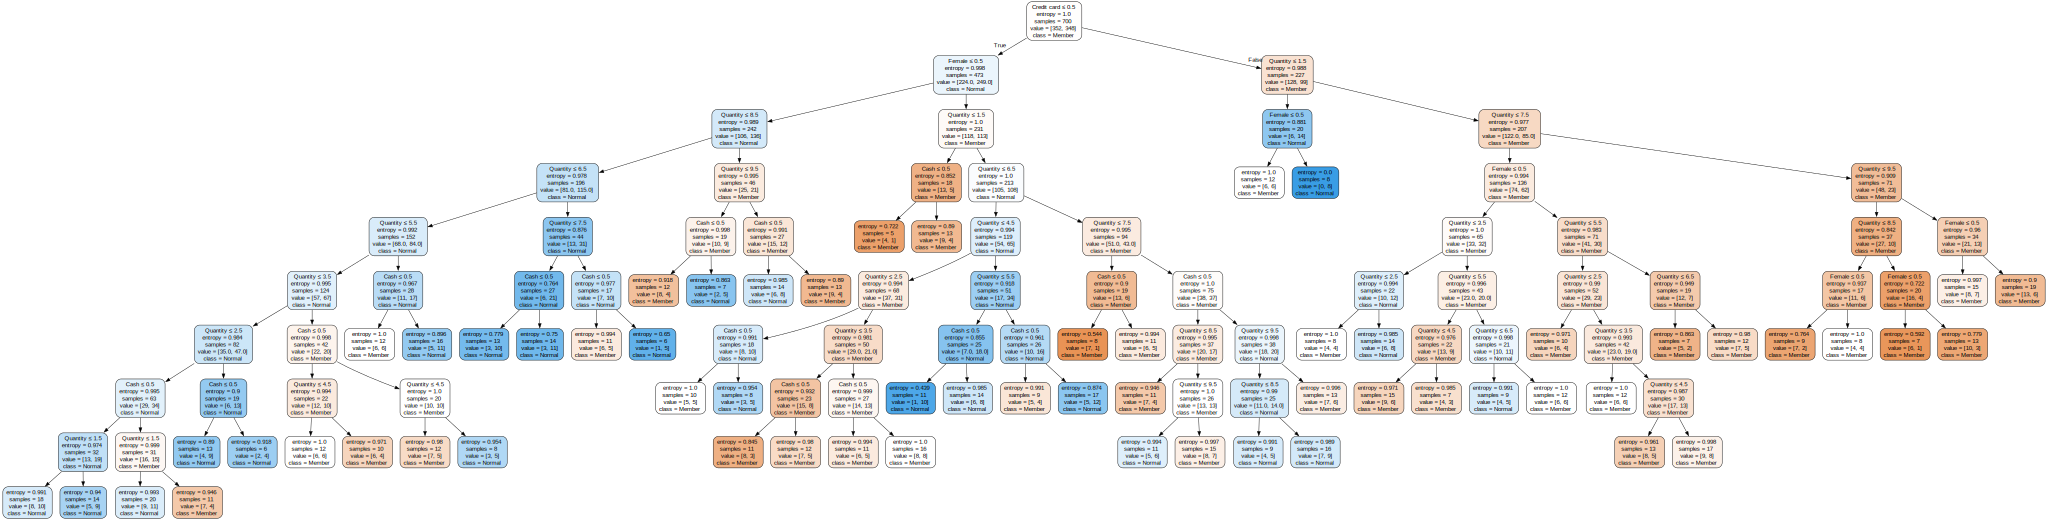

In [44]:
# Create dot file
dot_data = tree.export_graphviz(fullmodel, feature_names=features, class_names
=target_names,filled = True, rounded=True, special_characters=True)

# Transform dot file to graph
graph = graphviz.Source(dot_data)
graph

In [45]:
help(export_graphviz)

Help on function export_graphviz in module sklearn.tree._export:

export_graphviz(decision_tree, out_file=None, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, leaves_parallel=False, impurity=True, node_ids=False, proportion=False, rotate=False, rounded=False, special_characters=False, precision=3, fontname='helvetica')
    Export a decision tree in DOT format.
    
    This function generates a GraphViz representation of the decision tree,
    which is then written into `out_file`. Once exported, graphical renderings
    can be generated using, for example::
    
        $ dot -Tps tree.dot -o tree.ps      (PostScript format)
        $ dot -Tpng tree.dot -o tree.png    (PNG format)
    
    The sample counts that are shown are weighted with any sample_weights that
    might be present.
    
    Read more in the :ref:`User Guide <tree>`.
    
    Parameters
    ----------
    decision_tree : object
        The decision tree estimator to be exported t

In [46]:
graph.render("fulltree")

'fulltree.pdf'

## Decision Tree Regression

### Define Target and Features

In [63]:
# Target is continuous variable
# Define independent variables / attirbutes / features

features2 = ['Unit price','Quantity','Female', 'Cash','Credit card'] 

In [64]:
# Define the target variable

target2 = ['gross income']

In [65]:
# Get defined dataset

X2 = dfnew2 [features2]
y2 = dfnew2 [target2]

### Split Data into Training and Testing Sets

In [66]:
# from sklearn.model_selection import train_test_split
# split data into 70% and 30%, put 30% in testing

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state = 10)

In [115]:
# import DecisionTreeRegressor and define full-grown tree model
# import the regressor

from sklearn.tree import DecisionTreeRegressor
fullmodel2 = DecisionTreeRegressor(criterion='squared_error', min_impurity_decrease=0.005)

In [116]:
help(DecisionTreeRegressor)

Help on class DecisionTreeRegressor in module sklearn.tree._classes:

class DecisionTreeRegressor(sklearn.base.RegressorMixin, BaseDecisionTree)
 |  DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0, monotonic_cst=None)
 |  
 |  A decision tree regressor.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
 |      The function to measure the quality of a split. Supported criteria
 |      are "squared_error" for the mean squared error, which is equal to
 |      variance reduction as feature selection criterion and minimizes the L2
 |      loss using the mean of each terminal node, "friedman_mse", which uses
 |      mean squared error wi

### Fit Tree Model

In [117]:
# fit the model by 70% training data

fullmodel2.fit(X_train2, y_train2)

DecisionTreeRegressor(min_impurity_decrease=0.005)

In [118]:
y_pred2 = fullmodel2.predict(X_test2)
y_pred2

array([ 3.50058824, 22.04775   ,  3.50058824, 17.4315    , 11.4744    ,
       16.90245   , 19.208     ,  8.32575   ,  6.62088889, 39.35333333,
        3.50058824,  9.51665   ,  7.06685714,  4.23104545,  3.50058824,
        3.50058824, 13.278     , 16.90245   , 25.412     , 17.4025    ,
       44.5335    , 18.79275   , 27.826     , 37.522     ,  2.20997727,
       25.412     ,  1.00765   ,  1.78481818, 19.51464286,  6.024     ,
        1.78481818,  7.06685714,  7.6726    ,  1.00765   ,  6.024     ,
        9.858625  ,  2.72503333,  1.00765   ,  9.20833333, 12.888     ,
        5.8837    , 31.8875    , 20.34      ,  8.55825   ,  1.00765   ,
       19.51464286, 15.11333333, 10.69275   , 27.228     ,  4.54028125,
        8.32575   , 15.11333333, 25.412     , 40.165875  ,  9.51665   ,
       27.228     , 10.6074    , 10.69275   , 19.208     ,  3.71233333,
       10.91083333, 44.5335    , 41.30375   , 13.278     , 44.572     ,
       27.78883333, 23.848125  , 10.91083333, 15.11333333,  4.60

In [119]:
# get tree object and view its structure

treeObj2 = fullmodel2.tree_

In [120]:
# nodes of tree

treeObj2.node_count

221

In [121]:
# depth of the tree

treeObj2.max_depth

9

### Test Model Performance

In [62]:
fullmodel2.score(X_test2, y_test2, sample_weight=None)

0.9975430741172738